0.5406437051654323
0.24655948069904102


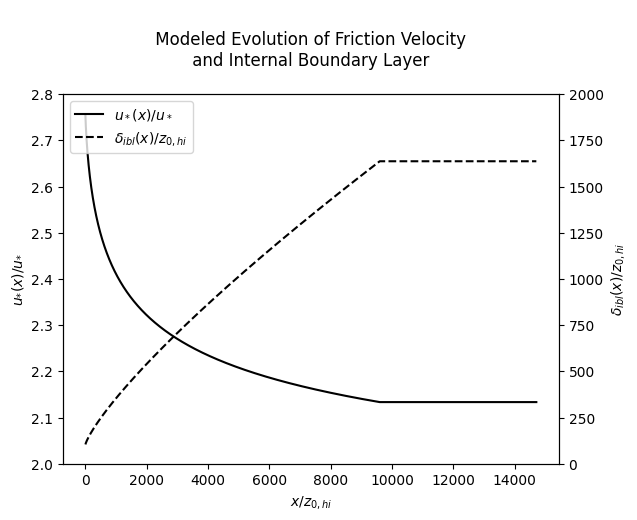

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math

delta_ibl_0 = 70
z_0hi = 0.68
z_0lo = 0.0001
z_h = 70
s_x = 7
D = 80
f = 10**(-4)
k = 0.4
C_star = 4.5
C = 4
U_G = 10
u_star_hi = (k * U_G) / (np.log(U_G / (f * z_0hi)) - C_star)
print(u_star_hi)
u_star_lo = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
print(u_star_lo)
H_G = 1112.97

# Define x values scaled by z_0hi
x = np.arange(1, 10001, 1)  # Distance in meters
x_scaled = x / z_0hi  # Scale x-axis

# Calculate δ_ibl(x) / z_0hi (scaled internal boundary layer height)
ibl_x = delta_ibl_0 + z_0hi * (x / z_0hi) ** (4 / 5)
ibl_x = ibl_x / z_0hi  # Scale by z_0hi
ibl_x[ibl_x >= H_G / z_0hi] = H_G / z_0hi  # Apply boundary limit

# Calculate u_*(x) / u_* (scaled friction velocity evolution)
u_star_x = u_star_hi * (np.log(ibl_x/z_0lo)) / (np.log(ibl_x/z_0hi))  # Simplified model
u_star_x_scaled = u_star_x / u_star_hi # Normalize by initial friction velocity

# Plot both curves
fig, ax1 = plt.subplots()

# Plot u_*(x) / u_*
ax1.plot(x_scaled, u_star_x_scaled, 'k-', label=r'$u_*(x) / u_*$')
ax1.set_xlabel(r'$x / z_{0,hi}$')
ax1.set_ylabel(r'$u_{*}(x) / u_{*}$', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(2, 2.8)

# Create secondary y-axis for δ_ibl(x) / z_0hi
ax2 = ax1.twinx()
ax2.plot(x_scaled, ibl_x, 'k--', label=r'$\delta_{ibl}(x) / z_{0,hi}$')
ax2.set_ylabel(r'$\delta_{ibl}(x) / z_{0,hi}$', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 2000)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Title
plt.title(" \n Modeled Evolution of Friction Velocity \n and Internal Boundary Layer \n")

# Show the plot
plt.show()